In [ ]:
%pip install fashion-clip
%pip install faiss-cpu

In [76]:
from PIL import Image

# Define the size of the image (width, height) in pixels
width = 2048
height = 3072

# Create a new image with white background
image = Image.new("RGB", (width, height), "red")

# Save the image to a file
image.save("images/red.jpg")

In [78]:
from fashion_clip.fashion_clip import FashionCLIP
import os
import numpy as np
fclip = FashionCLIP('fashion-clip')

image_names = ["images/red.jpg"] + ["/mnt/c/Users/pablo/Desktop/hack/images/" + str(n) + ".jpg" for n in range(10000) if os.path.exists("/mnt/c/Users/pablo/Desktop/hack/images/" + str(n) + ".jpg")]

# we create image embeddings and text embeddings
image_embeddings = fclip.encode_images(image_names, batch_size=32)
image_embeddings = image_embeddings/np.linalg.norm(image_embeddings, ord=2, axis=-1, keepdims=True)

237it [14:08,  3.58s/it]                         


In [79]:
print(image_embeddings.shape)
# save the embeddings
np.save('image_embeddings.npy', image_embeddings)

(7557, 512)


In [98]:
import faiss

# we create an index
index = faiss.IndexFlatL2(image_embeddings.shape[1])
index.add(image_embeddings)

# we search for the nearest neighbors of the third image
D, I = index.search(image_embeddings[9:10], 5)

print(I)

[[   9 3132 1235 4549  667]]


In [142]:
rojo = image_embeddings[0]
image_embeddings.shape

(7557, 512)

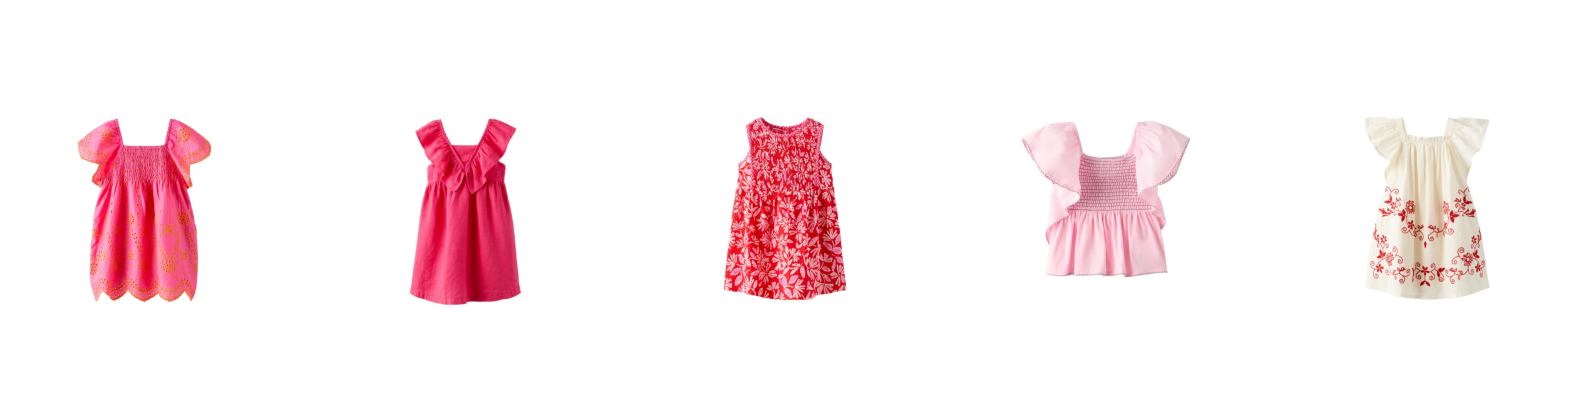

In [99]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20, 10))
for i, idx in enumerate(I[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mpimg.imread(image_names[idx]))
    plt.axis('off')
plt.show()

In [83]:
#Gram-Schmidt

def gram_schmidt(basis):
    res = np.zeros(basis.shape)
    res[:, 0] = basis[:, 0]
    for k in range(1, basis.shape[1]):
        vec = basis[:, k]
        acum = 0
        for i in range(0, k):
            lamb = np.dot(basis[:, k], res[:, i]) / np.dot(res[:, i], res[:, i])
            acum += lamb * res[:, i]
        res[:, k] = vec - acum

    return res


In [146]:
import numpy as np

mod_value = 1

identity = np.eye(image_embeddings.shape[1])
identity[:,0] = rojo
orthogonal = gram_schmidt(identity)
inv_orthogonal = np.linalg.inv(orthogonal)
trasnf = np.eye(image_embeddings.shape[1])
trasnf[0, 0] = mod_value

new_embeddings = orthogonal @ trasnf @ inv_orthogonal
new_embeddings.shape


(512, 512)

In [141]:
import numpy as np

mod_value = 2

a = np.array([1, 0])

identity = np.eye(a.shape[0])
identity[:,0] = np.array([1, 1])
orthogonal = gram_schmidt(identity)
inv_orthogonal = np.linalg.inv(orthogonal)
trasnf = np.eye(a.shape[0])
trasnf[0, 0] = mod_value

b = orthogonal @ trasnf @ inv_orthogonal @ a.T
print(b)

[1.5 0.5]


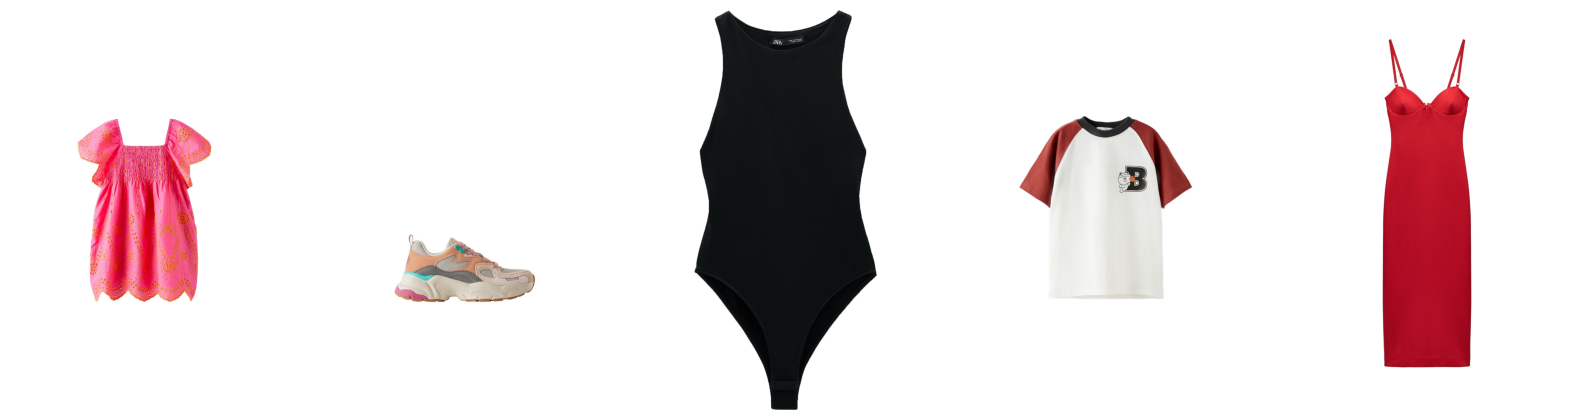

In [121]:
import faiss

# we create an index
index = faiss.IndexFlatL2(new_embeddings.shape[1])
index.add(new_embeddings)

# we search for the nearest neighbors of the third image
D, I = index.search(new_embeddings[9:10], 5)

plt.figure(figsize=(20, 10))
for i, idx in enumerate(I[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mpimg.imread(image_names[idx]))
    plt.axis('off')
plt.show()